In [44]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# sample data
data = {
   'age' : [25, 28, 50, 75, 60, 10],
   'income' : [5000, 10000, 7000, 15000, 12000, 13000]
}

df = pd.DataFrame(data)
df

,age,income
0,25,5000
1,28,10000
2,50,7000
3,75,15000
4,60,12000
5,10,13000


In [3]:
df.describe()

,age,income
count,6.000000,6.000000
mean,41.333333,10333.333333
std,24.426761,3777.124126
min,10.000000,5000.000000
25%,25.750000,7750.000000
50%,39.000000,11000.000000
75%,57.500000,12750.000000
max,75.000000,15000.000000


In [4]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns = ['age', 'income'])

In [7]:
df_scaled

,age,income
0,-0.732486,-1.546778
1,-0.597948,-0.096674
2,0.388666,-0.966736
3,1.509819,1.353431
4,0.837127,0.483368
5,-1.405178,0.773389


In [39]:
import matplotlib.pyplot as plt

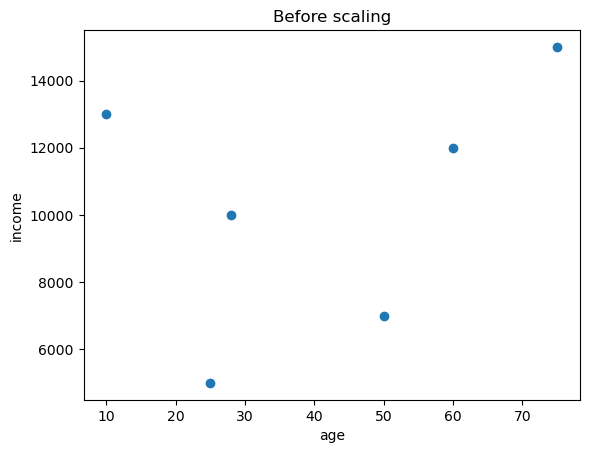

In [10]:
plt.scatter(df['age'], df['income'])
plt.title("Before scaling")
plt.xlabel('age')
plt.ylabel('income')
plt.show()

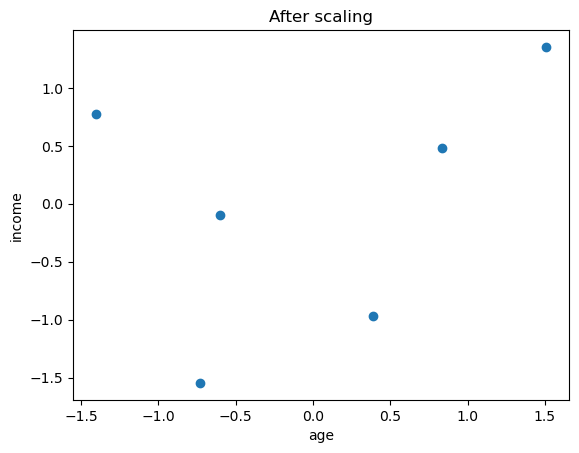

In [11]:
plt.scatter(df_scaled['age'], df_scaled['income'])
plt.title("After scaling")
plt.xlabel('age')
plt.ylabel('income')
plt.show()

In [19]:
social = pd.read_csv('Social_Network_Ads.csv')
social = social.iloc[:, 2:]

In [20]:
X = social.drop('Purchased', axis=1)
y = social['Purchased']

In [21]:
from sklearn.model_selection import train_test_split 

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [23]:
X_train.shape, X_test.shape

((320, 2), (80, 2))

# Standard Scaler

In [17]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [25]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
scaler.mean_

array([3.7871875e+01, 7.0281250e+04])

In [27]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [29]:
X_train.describe()

,Age,EstimatedSalary
count,320.000000,320.00000
mean,37.871875,70281.25000
std,10.207525,34430.55286
min,18.000000,15000.00000
25%,30.000000,43000.00000
50%,37.000000,71000.00000
75%,45.000000,88000.00000
max,60.000000,150000.00000


In [32]:
np.round(X_train.describe(), 1)

,Age,EstimatedSalary
count,320.0,320.0
mean,37.9,70281.2
std,10.2,34430.6
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,71000.0
75%,45.0,88000.0
max,60.0,150000.0


In [33]:
np.round(X_train_scaled.describe(),1|)

,Age,EstimatedSalary
count,320.0,320.0
mean,-0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.7,0.5
max,2.2,2.3


# Effect of Scaling

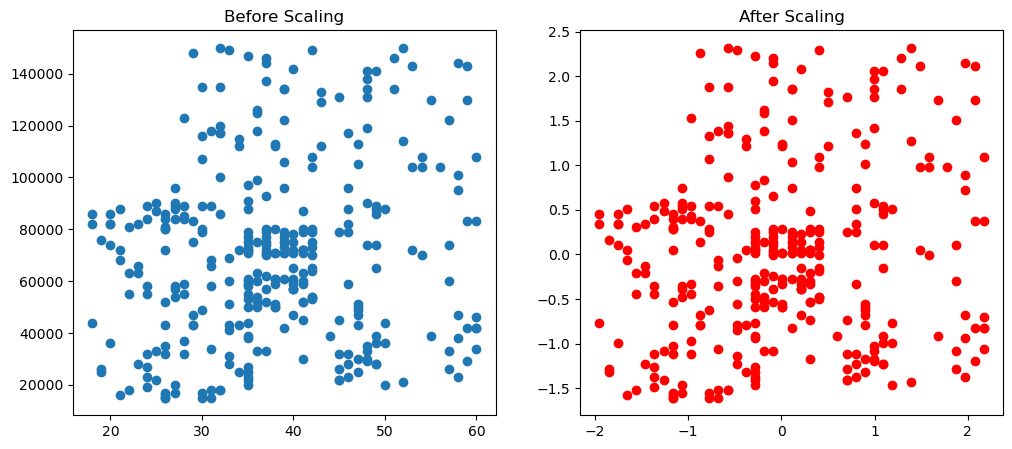

In [41]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title('Before Scaling')

ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color = 'red')
ax2.set_title('After Scaling')

plt.show()

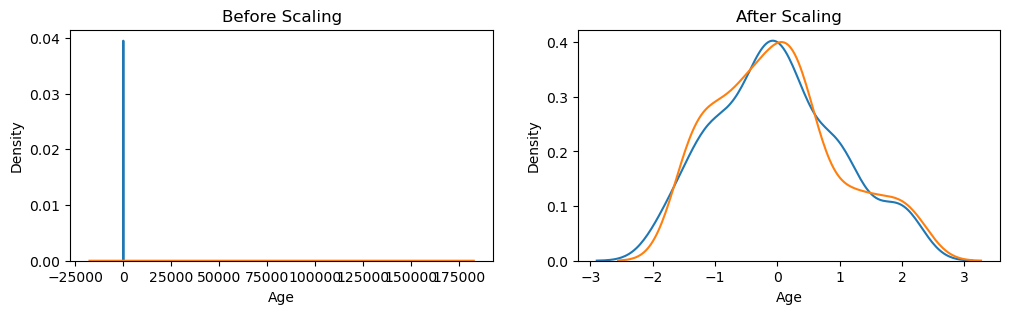

In [46]:
fig, (ax1, ax2) = plt.subplots(ncols= 2 , figsize = (12, 3))

# before scaling
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax = ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

# After scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'], ax = ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)

plt.show()

# Comparision of Distribution

<Axes: title={'center': 'Age Distribution after Scaling'}, xlabel='Age', ylabel='Density'>

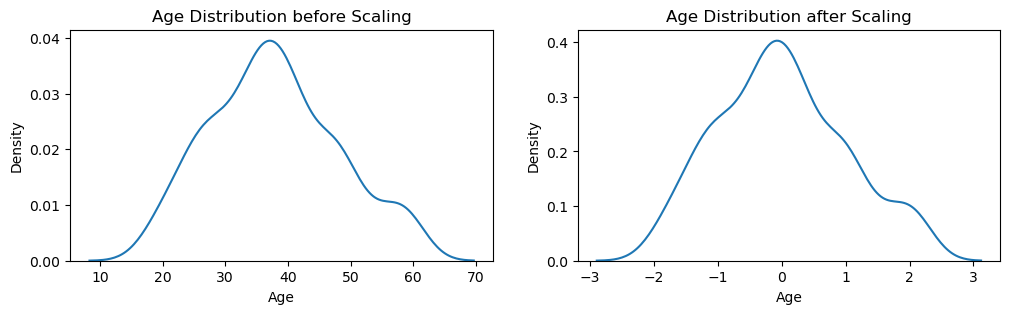

In [48]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 3))

ax1.set_title('Age Distribution before Scaling')
sns.kdeplot(X_train['Age'], ax = ax1)

ax2.set_title('Age Distribution after Scaling')
sns.kdeplot(X_train_scaled['Age'], ax = ax2)

<Axes: title={'center': 'Estimited salary Distribution after Scaling'}, xlabel='EstimatedSalary', ylabel='Density'>

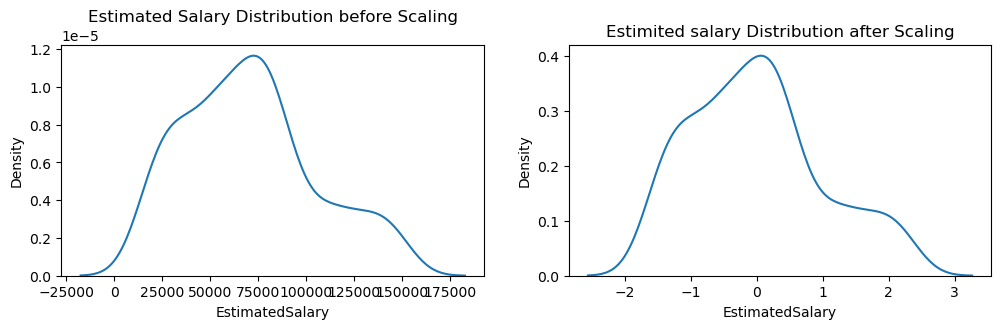

In [50]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 3))

ax1.set_title('Estimated Salary Distribution before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax = ax1)

ax2.set_title('Estimited salary Distribution after Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax = ax2)

# Why it is heavily used?

In [51]:
from sklearn.linear_model import LogisticRegression

In [52]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [54]:
lr.fit(X_train, y_train)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

In [63]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
print("Actual: ", accuracy_score(y_test, y_pred))
print("Scaled: ", accuracy_score(y_test, y_pred_scaled))

Actual:  0.65
Scaled:  0.8625


In [ ]:
# knn

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier()
knn_scaled = KNeighborsClassifier()

In [67]:
knn.fit(X_train, y_train)
knn_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [68]:
y_pred = knn.predict(X_test)
y_pred_scaled = knn_scaled.predict(X_test_scaled)

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
print("Actual: ", accuracy_score(y_test, y_pred))
print("Scaled: ", accuracy_score(y_test, y_pred_scaled))

Actual:  0.825
Scaled:  0.9125


In [71]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [72]:
dtc = DecisionTreeClassifier()
dtc_scaled = DecisionTreeClassifier()

In [73]:
dtc.fit(X_train, y_train)
dtc_scaled.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [74]:
y_pred = dtc.predict(X_test)
y_pred_scaled = dtc_scaled.predict(X_test_scaled)

In [75]:
print("Actual: ", accuracy_score(y_test, y_pred))
print("Scaled: ", accuracy_score(y_test, y_pred_scaled))

Actual:  0.8375
Scaled:  0.8375
